# compare OnBeam BNB data to MC-BNB/DATA cosmic overlay 
This is done by fixing two factors:
1. area-normalizing the overlay to match the OnBeam data
2. reweighting the cosmic in the overlay, to match the OnBeam in the preselection stage

and then studying what happens to the OnBeam/overlay comparison after all cuts

## The selected events

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

38163 pairs from On-Beam, 24323 in Fiducial Volume
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]

### no scaling to the overlay

In [6]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


In [7]:
print "plug in table tab:ApplicationOfCuts_Overlay in tab:ApplicationOfCuts_Overlay.tex"
print 
print 
print "\hline \hline"
i_label = 0
for i,row in pureffNumbers[:].iterrows(): 
    if i_label>= len(cutlabels): break
        
    print "			"+cutlabels[i_label]+"\
        & \\textcolor{black}{%d"%row['$N_{Overlay}$']+"}\
        & \\textcolor{black}{%.1f"%row['${\epsilon}_{Overlay}$ [%]']+"}\
        & \\textcolor{orange}{%d"%row['$N_{cosmic}$']+"}\
        & \\textcolor{red}{%d"%row['$N_{other pairs}$']+"}\
        & \\textcolor{teal}{%d"%row['$N_{1mu-1p}$']+"(\\textcolor{blue}{%d"%row['$N_{CC 1p 0pi}$']+"}) }\
        \\tabularnewline"
    print "\hline"        
    i_label+=1
print
print

plug in table tab:ApplicationOfCuts_Overlay in tab:ApplicationOfCuts_Overlay.tex


\hline \hline
			preselection        & \textcolor{black}{186485}        & \textcolor{black}{100.0}        & \textcolor{orange}{95259}        & \textcolor{red}{41519}        & \textcolor{teal}{49707(\textcolor{blue}{23996}) }        \tabularnewline
\hline
			$dE/dx$ profile        & \textcolor{black}{44411}        & \textcolor{black}{23.8}        & \textcolor{orange}{5001}        & \textcolor{red}{8021}        & \textcolor{teal}{31389(\textcolor{blue}{16481}) }        \tabularnewline
\hline
			optical filter        & \textcolor{black}{32813}        & \textcolor{black}{17.6}        & \textcolor{orange}{1688}        & \textcolor{red}{5491}        & \textcolor{teal}{25634(\textcolor{blue}{13510}) }        \tabularnewline
\hline
			track lengths        & \textcolor{black}{28109}        & \textcolor{black}{15.1}        & \textcolor{orange}{1369}        & \textcolor{red}{3281}        & \textcolor{teal}{23459(\t

### re-scaling the cosmic in the overlay

In [8]:
overlay_scalings = dict()
overlay_scalings['N(On) scaling'] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                                                              
                                                        , f_Cosmic=None  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                        , OverlaySubsamples=reducedOverlay['no cut'])

In [9]:
f_Cosmic=0.8658
overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)) # total integral of all overlay                                                                        
                                                                                    , f_Cosmic=f_Cosmic  # fraction of cosmic in the overlay, need to be in the range 0-1
                                                                                    , OverlaySubsamples=reducedOverlay['no cut'])
print 'overlay scalings';pp.pprint(overlay_scalings)

overlay scalings
{   'N(On) scaling': {   '1mu-1p': 0.13042872080864412,
                         'CC 1p 0pi': 0.13042872080864415,
                         'N(Ovelay)/N(On)': 7.667022982362373,
                         'cosmic': 0.13042872080864412,
                         'other pairs': 0.13042872080864415},
    'N(On) scaling and f(cosmic)=0.866': {   '1mu-1p': 0.03578088045074869,
                                             'CC 1p 0pi': 0.03578088045074869,
                                             'N(Ovelay)/N(On)': 7.667022982362373,
                                             'cosmic': 0.22106943595880704,
                                             'other pairs': 0.03578088045074868}}


In [10]:
# dump to csv file
import json
filename = figures_path+"overlay_scaling.txt"
json.dump(overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic], open(filename,'w'))
print 'saved scaling into',filename

saved scaling into /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/overlay_scaling.txt


In [11]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic])
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)
Chi2Proton,63.1%,70.7%,68.7%,37.1%,Chi2Proton,63.1% (31389),19.3% (8021),5.2% (5001),68.7% (16481)
MatchedFlash,51.6%,78.1%,56.3%,41.2%,MatchedFlash,51.6% (25634),13.2% (5491),1.8% (1688),56.3% (13510)
length,47.2%,83.5%,52.5%,44.8%,length,47.2% (23459),7.9% (3281),1.4% (1369),52.5% (12600)
non-collinearity,43.1%,87.4%,49.7%,48.7%,non-collinearity,43.1% (21412),5.8% (2409),0.7% (673),49.7% (11926)
vertex activity,31.0%,89.1%,44.2%,61.5%,vertex activity,31.0% (15391),3.7% (1538),0.4% (346),44.2% (10616)
delta phi,20.6%,95.3%,33.7%,75.2%,delta phi,20.6% (10241),0.9% (382),0.1% (118),33.7% (8080)
Pt & delta phi,18.2%,96.3%,30.4%,77.8%,Pt & delta phi,18.2% (9035),0.7% (270),0.1% (79),30.4% (7304)


In [12]:
print "plug in table tab:ApplicationOfCuts_OverlayRescaled in SelectedEvents.tex"
print 
print 
print "\hline \hline"
i_label = 0
for i,row in pureffNumbers[:].iterrows(): 
    if i_label>= len(cutlabels): break
        
    print "			"+cutlabels[i_label]+"\
        & \\textcolor{black}{%d"%row['$N_{Overlay scaled}$']+"}\
        & \\textcolor{black}{%.1f"%row['${\epsilon}_{Overlay scaled}$ [%]']+"}\
        & \\textcolor{orange}{%d"%row['$N_{cosmic scaled}$']+"}\
        & \\textcolor{red}{%d"%row['$N_{other pairs scaled}$']+"}\
        & \\textcolor{teal}{%d"%row['$N_{1mu-1p scaled}$']+"(\\textcolor{blue}{%d"%row['$N_{CC 1p 0pi scaled}$']+"}) }\
        \\tabularnewline"
    print "\hline"        
    i_label+=1
print
print

plug in table tab:ApplicationOfCuts_OverlayRescaled in SelectedEvents.tex


\hline \hline
			preselection        & \textcolor{black}{24323}        & \textcolor{black}{100.0}        & \textcolor{orange}{21058}        & \textcolor{red}{1485}        & \textcolor{teal}{1778(\textcolor{blue}{858}) }        \tabularnewline
\hline
			$dE/dx$ profile        & \textcolor{black}{2515}        & \textcolor{black}{10.3}        & \textcolor{orange}{1105}        & \textcolor{red}{286}        & \textcolor{teal}{1123(\textcolor{blue}{589}) }        \tabularnewline
\hline
			optical filter        & \textcolor{black}{1486}        & \textcolor{black}{6.1}        & \textcolor{orange}{373}        & \textcolor{red}{196}        & \textcolor{teal}{917(\textcolor{blue}{483}) }        \tabularnewline
\hline
			track lengths        & \textcolor{black}{1259}        & \textcolor{black}{5.2}        & \textcolor{orange}{302}        & \textcolor{red}{117}        & \textcolor{teal}{839(\textcolor{blue}{450}) }        \

## impact on the data

In [13]:
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'done applying cuts to data'
BeamOnNumbers

done applying cuts to data


,$N_{Off}$,$N_{Off}^{scaled}$,$N_{On-Off}$,$N_{On}$,${\epsilon}_{Off}$ [%],${\epsilon}_{On-Off}$ [%],${\epsilon}_{On}$ [%]
preselection,-1,-1,-1,24323,100.0,100,100.000000
Chi2Proton,-1,-1,-1,2621,-1.0,-1,10.775809
MatchedFlash,-1,-1,-1,1891,-1.0,-1,7.774534
length,-1,-1,-1,1605,-1.0,-1,6.598693
non-collinearity,-1,-1,-1,1259,-1.0,-1,5.176171
vertex activity,-1,-1,-1,693,-1.0,-1,2.849155
delta phi,-1,-1,-1,417,-1.0,-1,1.714427
Pt & delta phi,-1,-1,-1,350,-1.0,-1,1.438967


In [14]:
print "plug in table tab:ApplicationOfCuts_BeamOn in SelectedEvents.tex"
print 
print 
print "\hline \hline"
i_label = 0
for i,row in BeamOnNumbers[:].iterrows(): 
    if i_label>= len(cutlabels): break
        
    print "			"+cutlabels[i_label]+"\
        & \\textcolor{black}{%d"%row['$N_{On}$']+"}\
        & \\textcolor{black}{%.1f"%row['${\epsilon}_{On}$ [%]']+"}\
        \\tabularnewline"
    print "\hline"        
    i_label+=1
print
print

plug in table tab:ApplicationOfCuts_BeamOn in SelectedEvents.tex


\hline \hline
			preselection        & \textcolor{black}{24323}        & \textcolor{black}{100.0}        \tabularnewline
\hline
			$dE/dx$ profile        & \textcolor{black}{2621}        & \textcolor{black}{10.8}        \tabularnewline
\hline
			optical filter        & \textcolor{black}{1891}        & \textcolor{black}{7.8}        \tabularnewline
\hline
			track lengths        & \textcolor{black}{1605}        & \textcolor{black}{6.6}        \tabularnewline
\hline
			collinearity        & \textcolor{black}{1259}        & \textcolor{black}{5.2}        \tabularnewline
\hline
			vertex activity        & \textcolor{black}{693}        & \textcolor{black}{2.8}        \tabularnewline
\hline
			coplanarity        & \textcolor{black}{417}        & \textcolor{black}{1.7}        \tabularnewline
\hline
			$p_t$ imbalance        & \textcolor{black}{350}        & \textcolor{black}{1.4}        \tabularnewline
\hline




### a list of the selected events

In [15]:
selected_events = reducedOnBeam['Pt & delta phi']
selected_overlay = dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_cc1p0pi = selected_overlay['CC 1p 0pi']

In [16]:
csv_name = figures_path+'CCQElike_BeamOn5e19_selected_events_rse.csv'
selected_events[['run','subrun','event']].to_csv(csv_name)
print 'output to ',csv_name

selected_events.to_csv(figures_path+'selected_events.csv')
for pair_type in pair_types:
    selected_overlay[pair_type].to_csv(figures_path+'selected_'+pair_type+'.csv')
selected_cc1p0pi.to_csv(figures_path+'selected_cc1p0pi.csv')
print 'output to ',figures_path,'.csv'

output to  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/CCQElike_BeamOn5e19_selected_events_rse.csv
output to  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/ .csv


### Kinematical distributions of the selected events

In [17]:
selected_events['reco_Pp_cos_theta'] = np.cos(selected_events['reco_Pp_theta'])
selected_events['reco_Pmu_cos_theta'] = np.cos(selected_events['reco_Pmu_theta'])
for pair_type in pair_types:
    reducedOverlay['Pt & delta phi'][pair_type]['reco_Pp_cos_theta'] = np.cos(reducedOverlay['Pt & delta phi'][pair_type]['reco_Pp_theta'])
    reducedOverlay['Pt & delta phi'][pair_type]['reco_Pmu_cos_theta'] = np.cos(reducedOverlay['Pt & delta phi'][pair_type]['reco_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

TypeError: plot_stacked_MCsamples() got an unexpected keyword argument 'reducedOverlay'

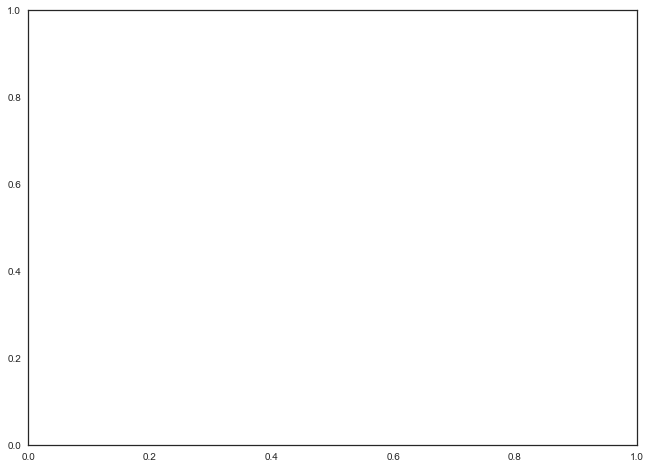

In [18]:
for particle,pname in zip(['mu','p']
                          ,['\mu','p']):
    fig=plt.figure(figsize=(24,8))
    for ivar,(var,x_label,bins,where) in enumerate(zip(['reco_P'+particle,'reco_P'+particle+'_cos_theta']
                                                 ,[r'$p_{'+pname+'}$ [GeV/c]',r'$\cos\theta_{'+pname+'}$']
                                                 ,[linspace(0.,1.3,15),linspace(-1,1,15)]
                                                       ,['post','pre'])):
        ax=fig.add_subplot(1,2,ivar+1)
        h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                               , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                               , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                               , fontsize=25                       
                               , stackColor='black',stackLabel='overlay'
                              );
        _,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['Pt & delta phi'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
        chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                             , h1=h_OnBeam , h2=h_stack
                                             , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                             , debug=0 )
        chi2_txt = r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf)
        ax.set_title(chi2_txt,y=1.02,fontsize=25)
#         h_stack = h_stack*np.sum(h_OnBeam)/np.sum(h_stack)
#         mid = 0.5*(bins[:-1]+bins[1:]);bin_width = bins[1]-bins[0]
#         plt.step(mid-0.5*bin_width*(1 if where=='post' else -1),h_stack ,color='red',where=where,label='area-normalized overlay')
        ax.legend(fontsize=20,loc='best')
    plt.tight_layout()
    filename = figures_path+'P_CosTheta_'+particle+'Candidate_SelectedBeamOnEvents.pdf'
    plt.savefig(filename)
    print 'saved',filename

In [ ]:
fig,ax=plt.subplots(figsize=(14.5,9))
var='reco_Q2'
x_label=r'$Q^2$ (GeV/c)$^2$'
bins=linspace(-0.01,1.01,13)
h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                               , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                               , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                               , fontsize=25                       
                               , stackColor='black',stackLabel='overlay'
                              );
_,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['Pt & delta phi'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                             , h1=h_OnBeam , h2=h_stack
                                             , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                             , debug=0 )
# h_stack = h_stack*np.sum(h_OnBeam)/np.sum(h_stack)
# mid = 0.5*(bins[:-1]+bins[1:]);bin_width = bins[1]-bins[0]
# plt.step(mid-0.5*bin_width,h_stack ,color='red',where='post',label='area-normalized overlay')

set_axes(ax,x_label,title=r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf))
ax.legend(fontsize=30)
plt.tight_layout()
filename = figures_path+'Q2_SelectedBeamOnEvents.pdf'
plt.savefig(filename)
print 'saved',filename

# now plot the overlay and data area-normalized, where both have the same integral

In [ ]:
for particle,pname in zip(['mu','p']
                          ,['\mu','p']):
    fig=plt.figure(figsize=(20,8))
    for ivar,(var,x_label,bins) in enumerate(zip(['reco_P'+particle,'reco_P'+particle+'_cos_theta']
                                                 ,[r'$p_{'+pname+'}$ [GeV/c]',r'$\cos\theta_{'+pname+'}$']
                                                 ,[linspace(0.,1.3,25),linspace(-1,1,25)])):
        ax=fig.add_subplot(1,2,ivar+1)
        _,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['Pt & delta phi'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
        h_stack,bins=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                               , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
                               , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                               , fontsize=25,do_individual_histograms=False,alpha=0.5                  
                               , stackColor='black',stackLabel='overlay after cuts'
                              );
        h_stack = h_stack*np.sum(h_OnBeam)/np.sum(h_stack)
        mid = 0.5*(bins[:-1]+bins[1:]);bin_width = bins[1]-bins[0]
        plt.step(mid+0.5*bin_width,h_stack ,color='red',label='area-normalized overlay')
        chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                             , h1=h_OnBeam , h2=h_stack
                                             , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                             , debug=0 )
        chi2_txt = r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf)
        ax.set_title(chi2_txt,y=1.02,fontsize=25)
        ax.legend(fontsize=25)
    plt.tight_layout()
    filename = figures_path+'P_CosTheta_'+particle+'Candidate_SelectedBeamOnEvents_AreaNormalized.pdf'
    plt.savefig(filename)
    print 'saved',filename

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
var='reco_Q2'
x_label=r'$Q^2$ (GeV/c)$^2$'
bins=linspace(-0.01,1.01,25)
_,h_OnBeam = plot_OnBeam(OnBeamSample=reducedOnBeam['Pt & delta phi'],OnBeamFV=reducedOnBeam['no cut'],markersize=8
                                         ,color='purple',x_label=x_label, var=var, bins=bins, ax=ax)
h_stack,bins=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                               , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.3f'%f_Cosmic]
                               , ax=ax, var=var, x_label=x_label,y_label='counts', bins=bins 
                               , fontsize=25,do_individual_histograms=False,alpha=0.5                  
                               , stackColor='black',stackLabel='overlay after cuts'
                              );
h_stack = h_stack*np.sum(h_OnBeam)/np.sum(h_stack)
mid = 0.5*(bins[:-1]+bins[1:]);bin_width = bins[1]-bins[0]
plt.step(mid+0.5*bin_width,h_stack ,color='red',label='area-normalized overlay')
chi2 , ndf = chi2_two_histograms( bins=bins, chi2_xrange=(np.min(bins),np.max(bins))
                                             , h1=h_OnBeam , h2=h_stack
                                             , h1err=np.sqrt(h_OnBeam), h2err=np.sqrt(h_stack)
                                             , debug=0 )
ax.set_title(r'$\chi^2/ndf=%.1f/%d$'%(chi2,ndf),y=1.02,fontsize=25)
ax.legend(fontsize=25)
plt.tight_layout()
filename = figures_path+'Q2_SelectedBeamOnEvents_AreaNormalized.pdf'
plt.savefig(filename)
print 'saved',filename